In [1]:
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

Código que genera 2000 puntos de datos bidimensionales divididos en 5 grupos (clusters). Los puntos de cada grupo se distribuyen alrededor de un centro específico con una desviación estándar variable:
- **make_blobs**: Esta función se utiliza para generar conjuntos de datos sintéticos para tareas de aprendizaje automático. 

'\n- X[:, 0]: coordenadas x de los puntos de datos\n- X[:, 1]: coordenadas y de los puntos de datos\n- c=y: la variable que se utiliza para colorear los puntos de datos según su grupo\n- s=1: el tamaño de los puntos de datos\n'

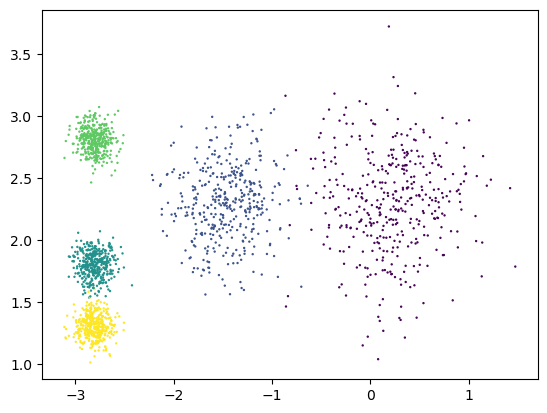

In [41]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std)

# Gráfica de dispersión
plt.scatter(X[:, 0], X[:, 1], c=y, s=0.5)

"""
- X[:, 0]: coordenadas x de los puntos de datos
- X[:, 1]: coordenadas y de los puntos de datos
- c: la variable que se utiliza para colorear los puntos de datos según su grupo
- s: el tamaño de los puntos de datos
"""

Código que utiliza el algoritmo **KMeans** para agrupar los 2000 puntos de datos en 5 grupos.<br> 
La variable y_pred contiene la etiqueta del grupo al que cada punto de datos ha sido asignado:

In [3]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred # cluster al que cada elemento fue asignado en la predicción

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 3, 0, ..., 4, 3, 0])

In [4]:
kmeans.cluster_centers_ # centros

array([[-2.79159541,  1.29909109],
       [-1.43438279,  2.27571998],
       [-2.79266149,  2.80663322],
       [ 0.25112618,  2.32128908],
       [-2.78925743,  1.80687666]])

In [5]:
kmeans.labels_ # durante train, a que cluster fue asignado cada elemento

array([2, 3, 0, ..., 4, 3, 0])

In [6]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)

- Esta función visualiza eficazmente cómo un modelo de clustering divide el espacio de características en regiones distintas.
- Es una herramienta valiosa para comprender los resultados del clustering, detectar pposibles problemas y comunicar hallazgos.

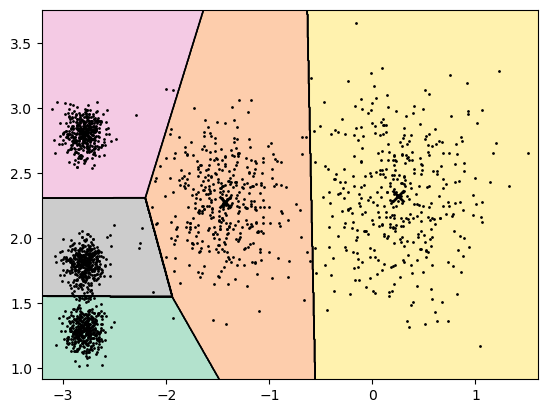

In [7]:
plot_decision_boundaries(kmeans, X)

In [8]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
print(kmeans.predict(X_new)) # esto nos da a que cluster fueron asignados
kmeans.transform(X_new) # Calcula la distancia de cada punto de datos en X_new a cada centro de cluster.

[3 3 2 2]


array([[2.87824221, 1.46064215, 2.90682221, 0.40778797, 2.7959352 ],
       [5.83385384, 4.44294635, 5.84855403, 2.7675863 , 5.79247773],
       [1.71362878, 1.72503298, 0.28351361, 3.32121513, 1.21159223],
       [1.21885795, 1.58160007, 0.37015293, 3.25603425, 0.72445317]])

### kmeans.inertia_
- **Propósito**: Calcula la inercia o varianza dentro del cluster.
- **Definición**: La *inercia* es la suma de las distancias cuadradas entre cada punto de datos y su centro de cluster asignado. Un valor de inercia menor indica una mejor agrupación, ya que los puntos de datos están más cerca de sus centroides respectivos.

In [9]:
print(kmeans.inertia_)


"""
kmeans.score() calcula una puntuación basada en la inercia interna y la inercia externa (entre clusters).
Un valor más alto indica generalmente una mejor agrupación, ya que la inercia interna es menor en relación
a la varianza general de los datos.
"""
print(kmeans.score(X))

225.5553607646415
-225.55536076464153


## Evaluaciones del algoritmo KMeans

#### Evaluación usando el criterio de inercia
Este código evalúa el algoritmo KMeans usando el **criterio de inercia** para distintos números de clusters (k).<br>La gráfica muestra la inercia en función del número de clusters (k). El codo (punto donde la curva cambia bruscamente) puede indicar el valor de k óptimo, ya que a partir de ahí la disminución de inercia es menos significativa:

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\i

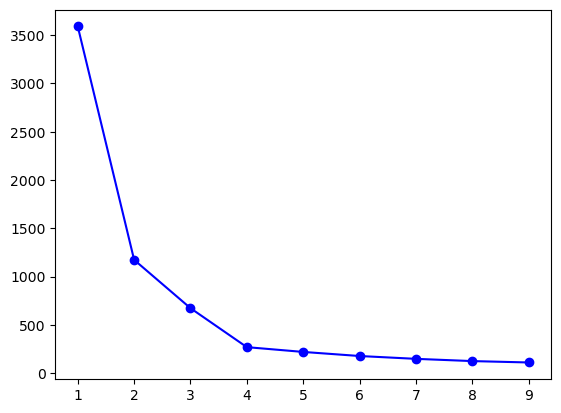

In [43]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")

#### Evaluación con Silhouette Score
La gráfica muestra el Silhouette Score en función del número de clusters (k). Un Silhouette Score alto indica una mejor separación entre clusters, donde los puntos dentro de un cluster están más cercanos entre sí que a los puntos de otros clusters:

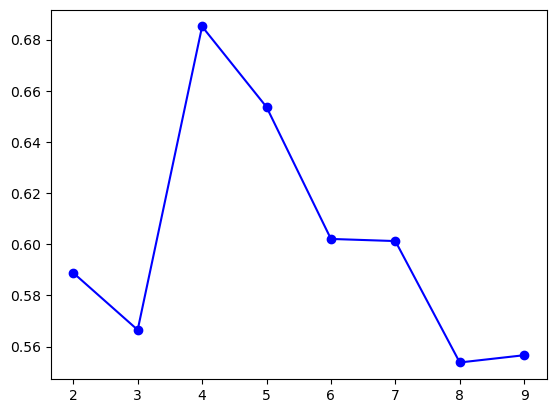

In [11]:
from sklearn.metrics import silhouette_score

# Se omite el primer elemento ya que representa el modelo con un cluster (k=1)
# y el Silhouette Score no es aplicable en ese caso.
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

> **Diferencia con la inercia**:
- La inercia mide la dispersión dentro de los clusters (cuanto más baja, mejor).
- El Silhouette Score mide la separación entre clusters (cuanto más alto, mejor).

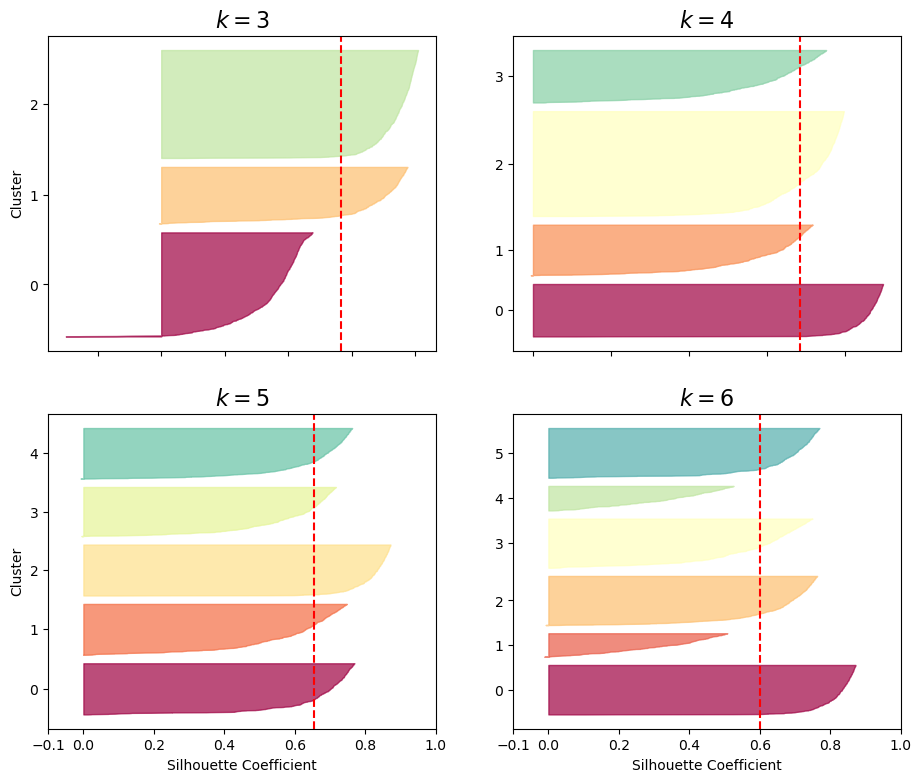

In [12]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)



In [13]:
# uso de clusters para parcial labeling

# cargamos un dataset tipo mnist
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)


In [14]:
# clasificación con regresión logística
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [15]:
# buscando mejor parametros con grid:

from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.9733333333333334

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "kmeans__n_clusters": range(2, 10),
    "log_reg__solver": ["lbfgs", "sag"]
}
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)
param_grid

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=2, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=2, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=2, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=2, log_reg__solver=sag; total time=   1.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=2, log_reg__solver=sag; total time=   1.3s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=2, log_reg__solver=sag; total time=   1.2s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=3, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=3, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=3, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=3, log_reg__solver=sag; total time=   0.8s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=3, log_reg__solver=sag; total time=   0.9s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=3, log_reg__solver=sag; total time=   0.8s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=4, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=4, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=4, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=4, log_reg__solver=sag; total time=   0.5s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=4, log_reg__solver=sag; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=4, log_reg__solver=sag; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=5, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=5, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=5, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=5, log_reg__solver=sag; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=5, log_reg__solver=sag; total time=   0.5s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=5, log_reg__solver=sag; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=6, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=6, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=6, log_reg__solver=lbfgs; total time=   0.4s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=6, log_reg__solver=sag; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=6, log_reg__solver=sag; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=6, log_reg__solver=sag; total time=   0.7s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=7, log_reg__solver=lbfgs; total time=   0.5s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=7, log_reg__solver=lbfgs; total time=   0.5s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=7, log_reg__solver=lbfgs; total time=   0.5s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=7, log_reg__solver=sag; total time=   0.7s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=7, log_reg__solver=sag; total time=   0.9s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=7, log_reg__solver=sag; total time=   0.9s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=8, log_reg__solver=lbfgs; total time=   0.5s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=8, log_reg__solver=lbfgs; total time=   0.5s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=8, log_reg__solver=lbfgs; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=8, log_reg__solver=sag; total time=   1.0s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=8, log_reg__solver=sag; total time=   1.0s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=8, log_reg__solver=sag; total time=   1.0s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=9, log_reg__solver=lbfgs; total time=   0.7s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=9, log_reg__solver=lbfgs; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ........kmeans__n_clusters=9, log_reg__solver=lbfgs; total time=   0.6s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=9, log_reg__solver=sag; total time=   1.2s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=9, log_reg__solver=sag; total time=   1.1s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[CV] END ..........kmeans__n_clusters=9, log_reg__solver=sag; total time=   1.2s


c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'kmeans__n_clusters': range(2, 10), 'log_reg__solver': ['lbfgs', 'sag']}

In [17]:
grid_clf.best_params_

{'kmeans__n_clusters': 9, 'log_reg__solver': 'lbfgs'}

In [18]:
grid_clf.score(X_test, y_test)

0.8955555555555555

In [19]:
# probamos entrenando con  50 al azar
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [20]:
# en vez de ser al azar, escogemos los más representativos
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
#X_digits_dist.shape
#representative_digit_idx.shape
X_representative_digits.shape

(50, 64)

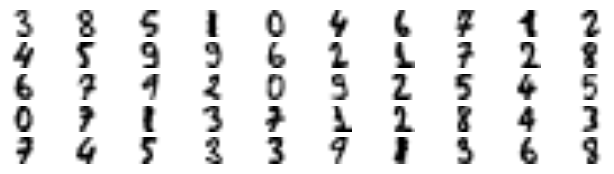

In [22]:
# los mostramos para que un humano los etiquete
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [23]:
# esto debería hacerse a mano...
y_representative_digits = y_train[representative_digit_idx]
y_representative_digits

array([3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8])

In [24]:
# entrenamos sólo con los dígitos más significativos
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

In [25]:
# propagamos la y a todos los miembros del clustes
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.9288888888888889

In [26]:
# propagamos la y al 75% más cercano del cluster
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.9111111111111111

### DBSCAN

In [27]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [28]:
len(dbscan.core_sample_indices_)

808

In [29]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [30]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [31]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [32]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)



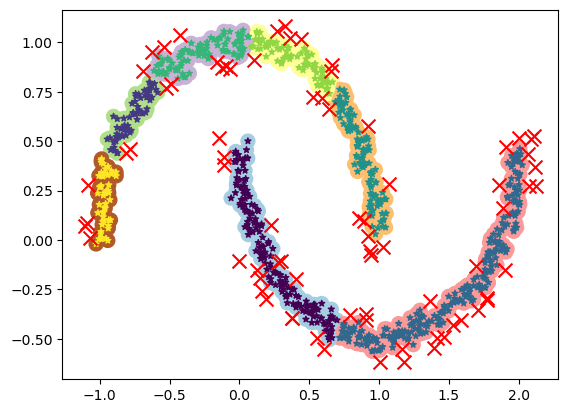

In [33]:
plot_dbscan(dbscan, X, size=100)

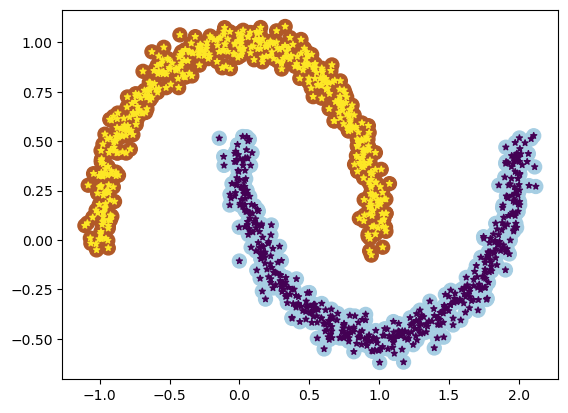

In [34]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(X)
plot_dbscan(dbscan, X, size=100)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [36]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

In [37]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)